**Project Data Mining, Marco Gregorius Suitela**


**Introduction**

Understanding customers buying behaviour is always the holy grail for the eCommerce industry. When we understand our customer behaviour, we can gain insight and knowledge to improve our business. With good understanding, we can eventually improving everything in our business such as higher sales, website improvement, and even make our customer more satisfied.

In this project, I'm using eCommerce behaviour data from a multi-category store from Kaggle. Following the CRISP-DM process, I'll make analysis about 4 aspect, which is :

  1. Website Analysis
*   Seeing the website traffic

  2. Event Data Analysis
*   Seeing what customer do, based on the event_type variable

  3. Brand/Product Analysis
*   Seeing what categories of product this website sell
*   Seeing what brand this website sell
*   Seeing what is the top brand according to the sales

  4. User/Customer Analysis
*   Seeing 3 user activities
*   Calculating the user who bought something, and counting how many user who bought more than once.

# **DATASET Preparation**

Installing Packages, Making Connection, and Load the Dataset

In [ ]:
#1. Load Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates 
from datetime import datetime
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# mounted google drive
import google.colab as gc
gc.drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# check the path
!pwd

/content


In [ ]:
# change folder
%cd '/content/drive/My Drive/Dibimbing/data_file/'

/content/drive/.shortcut-targets-by-id/1t8EkfV-chB44rwwHoMuk27bpM9uQIAqz/data_file


In [ ]:
#check file in the folder
!ls

 2019-Nov.csv
 2019-Nov.pkl
 2019-Oct.csv
 2019-Oct.hdf5
 2019-Oct.pkl
 2019-Oct.yaml
 data_student.pkl
 earthquake_data.csv
 ecommerce-behavior-data-from-multi-category-store.zip
 melb_data.csv
'property data.csv'
 quiz_data.json
'social media visitors (1).gsheet'
'social media visitors (2).gsheet'
'social media visitors.gsheet'
 student_grade_prediction.xlsx
 USA_Housing.csv
 USA_Housing.gsheet


In [ ]:
#read the data
df = pd.read_csv('2019-Oct.csv')
df.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
6,2019-10-01 00:00:08 UTC,view,17300353,2053013553853497655,NaN,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
7,2019-10-01 00:00:08 UTC,view,31500053,2053013558031024687,NaN,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6
8,2019-10-01 00:00:10 UTC,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
9,2019-10-01 00:00:11 UTC,view,1004545,2053013555631882655,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb


# **DATASET Checking**

1. Information about the data type (Glimpse)

2. Checking Missing Value

In [ ]:
#1. Dataset glimpse
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [ ]:
#2. Convert event_time 
df['event_time']=pd.to_datetime(df['event_time']).dt.tz_convert(None)
df['event_type']=df['event_type'].astype('category')
df['category_code']=df['category_code'].astype('category')

In [ ]:
#3. creating a summary table for general overview
daily_summary_table=df.groupby(by=[df['event_time'].dt.normalize()]).agg(Number_of_daily_visits=('user_session',lambda x: x.nunique()),
                                                                                  Number_of_daily_visitors=('user_id',lambda x: x.nunique())
                                                                                  )
sales_filter=df['event_type']=='purchase'
sales=df.loc[sales_filter].groupby(by=[df['event_time'].dt.normalize()]).agg(number_of_daily_sales=('event_type','count'),
                                                                                      Total_daily_sales=('price','sum')
                                                                                      ).reset_index()
daily_summary_table=pd.merge(left=daily_summary_table,
                          right=sales,
                          left_on=['event_time'],
                          right_on=['event_time'],
                          how='left')
daily_summary_table['conversion_rate']=daily_summary_table['number_of_daily_sales']/daily_summary_table['Number_of_daily_visits']

In [ ]:
#4. Missing Value Checking
df.isnull().sum().sum()

19632691

Jadi terdapat 19.632.691 Missing Value dengan rincian sbb:

In [ ]:
#Mendeteksi di-variabel mana terdapat missing value
df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64

Jadi Missing Value terdapat pada 3 variabel, dengan rincian sbb:

1. Category Code sebanyak 13.515.609

2. Brand sebanyak 6.117.080

3. User Session sebanyak 2

Untuk menangani missing value tsb, menurut saya tidak perlu diapa-apakan karena variabel category_code dan brand merupakan variabel "object" jadi tidak begitu berpengaruh terhadap pengolahan data secara statistik.

# **Website Analysis**

Di bagian ini, saya akan menganalisis bagaimana traffic dalam platfrom e-commerce ini

Daily Visits Statistics
--------------------------------------------------
count        31.000000
mean     299510.548387
std       25531.553700
min      241086.000000
25%      278957.500000
50%      301219.000000
75%      319668.500000
max      339943.000000
Name: Number_of_daily_visits, dtype: float64
--------------------------------------------------
Visit Statistics by Dates
--------------------------------------------------
            count       mean           std  ...       50%        75%       max
event_time                                  ...                               
Friday        4.0  321772.50  16017.261304  ...  325731.0  333799.50  334977.0
Monday        4.0  293353.00  26033.151442  ...  294346.5  311089.50  321282.0
Saturday      4.0  298041.75  19140.215435  ...  296976.5  308605.50  321300.0
Sunday        4.0  309080.00  32756.353552  ...  311671.5  335116.75  339943.0
Thursday      5.0  282820.60  24557.356776  ...  293587.0  295142.00  302842.0
Tuesday       5

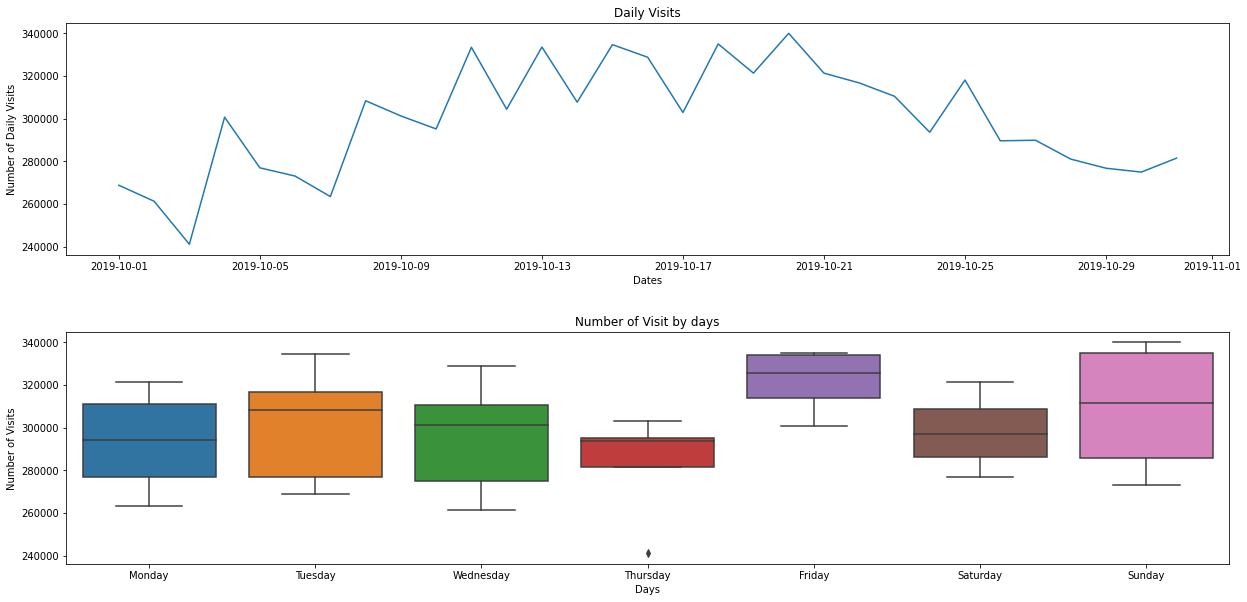

In [ ]:
#Daily Visits
print('Daily Visits Statistics')
print('-'*50)
print(daily_summary_table['Number_of_daily_visits'].describe())
print('-'*50)
print('Visit Statistics by Dates')
print('-'*50)
print(daily_summary_table.groupby(by=daily_summary_table['event_time'].dt.day_name())['Number_of_daily_visits'].describe())

#Plotting number of daily visits
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(2,1,1)
sns.lineplot(x='event_time',
              y='Number_of_daily_visits',
              data=daily_summary_table,
             ax=ax1)
plt.title('Daily Visits')
plt.ylabel('Number of Daily Visits')
plt.xlabel('Dates')

ax2=fig.add_subplot(2,1,2)

sns.boxplot(x=daily_summary_table['event_time'].dt.dayofweek,
            y='Number_of_daily_visits',
            data=daily_summary_table,
           ax=ax2)
plt.title('Number of Visit by days')
plt.ylabel('Number of Visits')
plt.xlabel('Days')
plt.xticks([0, 1, 2,3,4,5,6], ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig.tight_layout(pad=3.0);

# **Event Data Analysis**

Di bagian ini, saya akan menganalisis variabel-variabel yang berhubungan dengan "event" atau kegiatan customer di marketplace ini.

In [ ]:
#1. Melihat Aktifitas Konsumen berdasarkan event_type
df["event_type"].value_counts()

view        40779399
cart          926516
purchase      742849
Name: event_type, dtype: int64

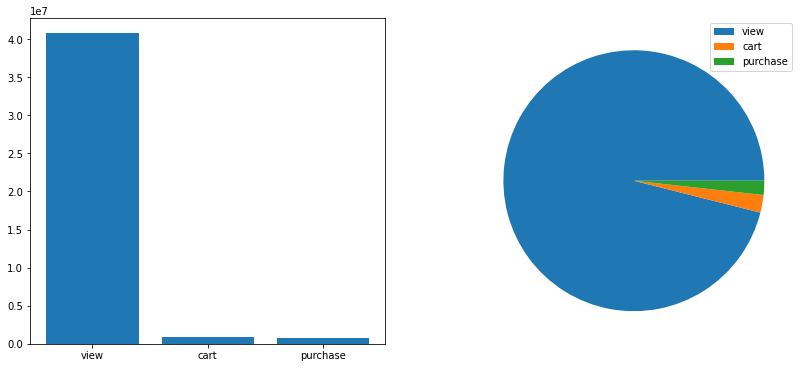

In [ ]:
#Visualisasi aktifitas konsumen dalam diagram batang (histogram)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
axes[0].bar(df["event_type"].value_counts().index,df["event_type"].value_counts().values)
axes[1].pie(df["event_type"].value_counts().values)
axes[1].legend(df["event_type"].value_counts().index)

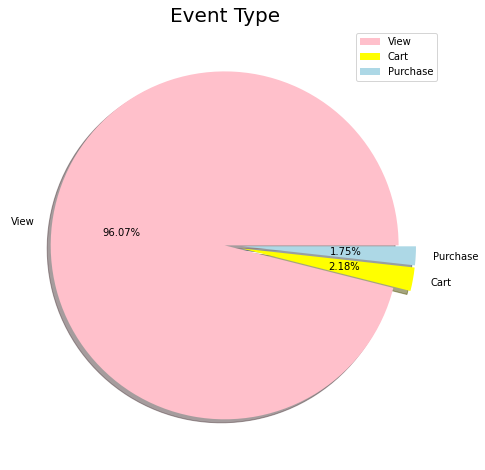

In [ ]:
#Visualisasi aktifitas konsumen dalam diagram lingkaran dengan persen
labels = ['View', 'Cart','Purchase']
size = df['event_type'].value_counts()
colors = ['pink', 'yellow','lightblue']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# **Brand / Product Data Analysis**

Di bagian ini saya akan menganalisis beberapa hal yang berhubungan dengan brand/produk yang dijual di platform ini, seperti

1. Jenis Produk yang dijual

2. Brand apa saja yang dijual

3. Brand yang paling laku


In [ ]:
#1. Jenis produk yang dijual

df["category_code"].value_counts()

electronics.smartphone          11507231
electronics.clocks               1311033
computers.notebook               1137623
electronics.video.tv             1113750
electronics.audio.headphone      1100188
                                  ...   
construction.tools.soldering         632
apparel.shorts                       632
apparel.jacket                       436
auto.accessories.anti_freeze         308
country_yard.furniture.bench         190
Name: category_code, Length: 126, dtype: int64

Di e-commerce ini, menjual 126 jenis barang,

Untuk barang yang paling banyak dijual adalah smartphone, dan yang paling sedikit adalah furniture (bench)

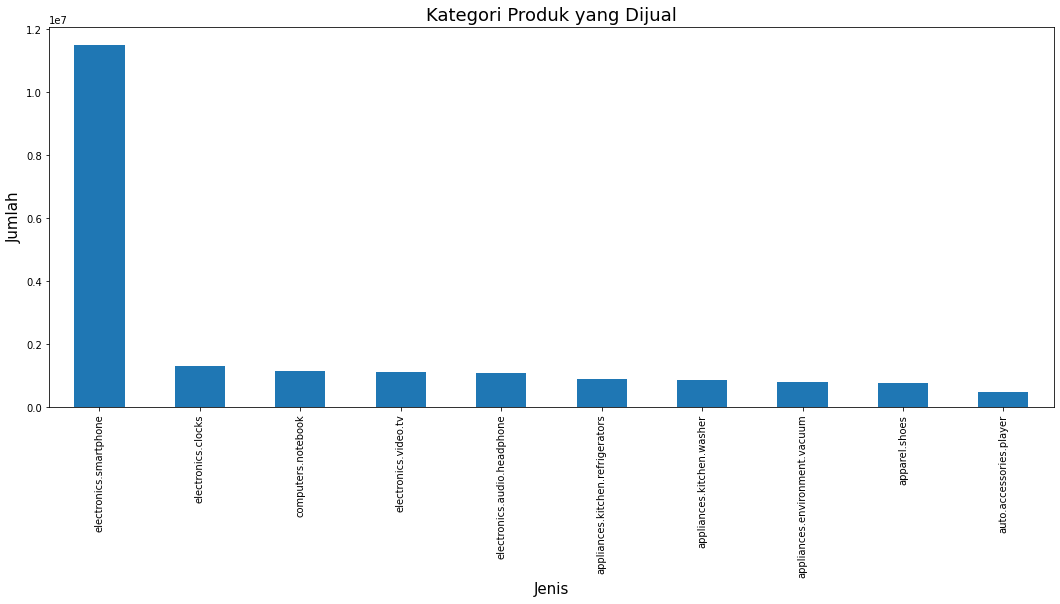

In [ ]:
#Visualisasi 10 Kategori produk yang dijual
df["category_code"].value_counts().head(10).plot.bar(figsize = (18,7))
plt.title("Kategori Produk yang Dijual", fontsize = 18)
plt.xlabel("Jenis", fontsize = 15)
plt.ylabel("Jumlah", fontsize=15)
plt.show()

In [ ]:
#2.Apa saja brand yang dijual (dan paling sering dilihat)?
df["brand"].value_counts()


samsung        5282775
apple          4122554
xiaomi         3083763
huawei         1111205
lucente         655861
                ...   
bombora              1
cornerstone          1
nicalis              1
t.bone               1
drop                 1
Name: brand, Length: 3444, dtype: int64

Untuk top brand-nya adalah Samsung, Apple, Xiaomi, dst.

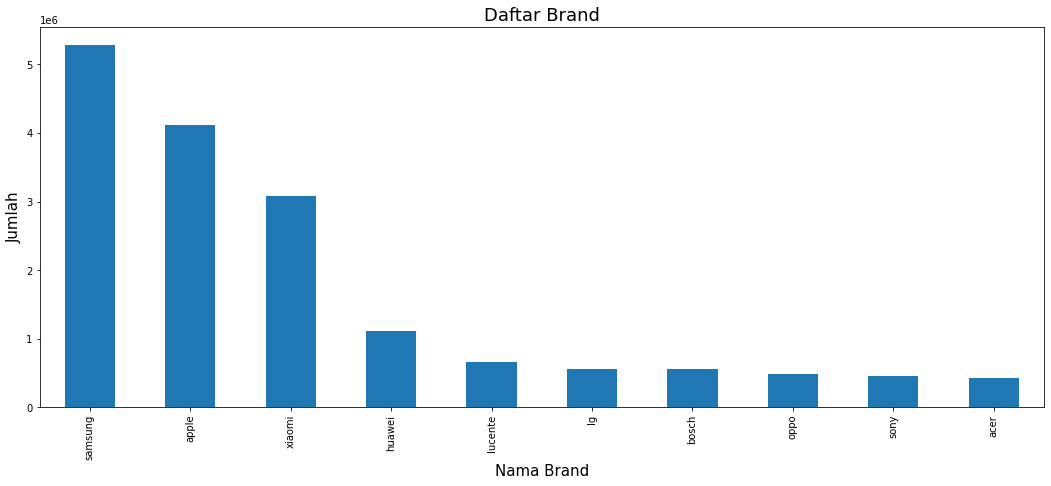

In [ ]:
#Visualisasi 10 Daftar Brand
df["brand"].value_counts().head(10).plot.bar(figsize = (18,7))
plt.title("Daftar Brand", fontsize = 18)
plt.xlabel("Nama Brand", fontsize = 15)
plt.ylabel("Jumlah", fontsize=15)
plt.show()

In [ ]:
#3. Mengetahui Produk yang terlaris
only_purchases = df.loc[df.event_type == "purchase"]
purchases_with_brands = only_purchases.loc[only_purchases.brand.notnull()]
top_brand = purchases_with_brands.groupby("brand").brand.agg([len]).sort_values(by="len", ascending= False)
top_brand.head(10)

,len
brand,
samsung,172896
apple,142873
xiaomi,56616
huawei,23501
lucente,11578
oppo,10891
cordiant,10551
lg,8727
acer,6882


Selain memiliki jumlah produk yang banyak, samsung juga berhasil meraih penjualan produk terbanyak

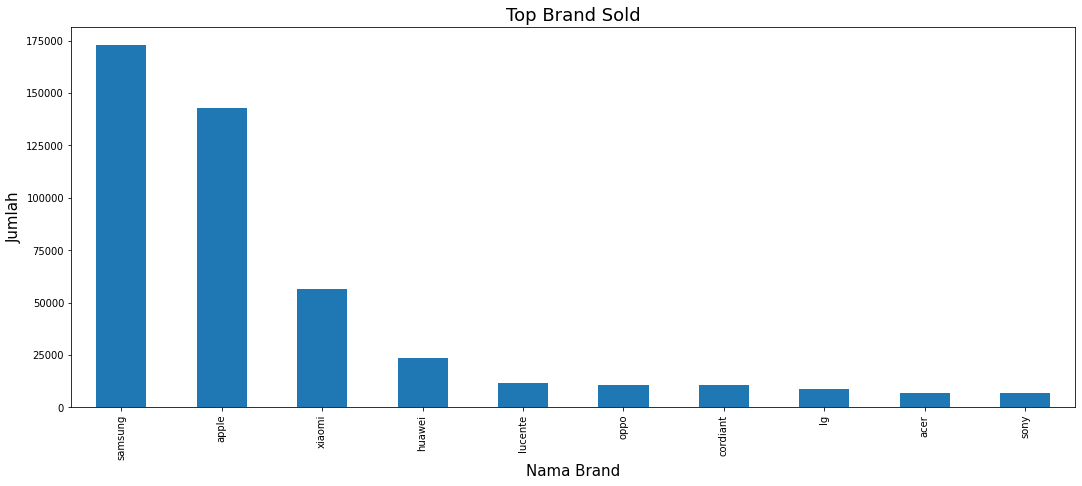

In [ ]:
#Visualisasi 10 Brand yang terlaris
only_purchases["brand"].value_counts().head(10).plot.bar(figsize = (18,7))
plt.title("Top Brand Sold", fontsize = 18)
plt.xlabel("Nama Brand", fontsize = 15)
plt.ylabel("Jumlah", fontsize=15)
plt.show()

# **User/Customer Data Analysis**

Di bagian ini saya akan menganalisis perilaku dari user/customer di platform ini
analisis yg dilakukan

1. Melihat kegiatan sebagian user

2. Melihat brp banyak customer yang melakukan repurchasing

In [ ]:
#Customer no 1, dengan id 513351129
user_session = 513351129
df.loc[df["user_id"] == user_session]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1784033,2019-10-02 10:44:17 UTC,view,1004785,2053013555631882655,electronics.smartphone,huawei,276.67,513351129,14a86681-3bb8-401c-b48b-7147804a6697
1784133,2019-10-02 10:44:25 UTC,view,1004781,2053013555631882655,electronics.smartphone,huawei,275.43,513351129,14a86681-3bb8-401c-b48b-7147804a6697
1784417,2019-10-02 10:44:41 UTC,view,1004848,2053013555631882655,electronics.smartphone,huawei,663.85,513351129,14a86681-3bb8-401c-b48b-7147804a6697
1784564,2019-10-02 10:44:51 UTC,view,1004848,2053013555631882655,electronics.smartphone,huawei,663.85,513351129,14a86681-3bb8-401c-b48b-7147804a6697
2259061,2019-10-02 17:23:54 UTC,view,1004785,2053013555631882655,electronics.smartphone,huawei,274.91,513351129,b55bfeb2-b998-4995-b046-6b122638e956
2259971,2019-10-02 17:24:38 UTC,view,1004785,2053013555631882655,electronics.smartphone,huawei,274.91,513351129,b55bfeb2-b998-4995-b046-6b122638e956
2428406,2019-10-02 22:45:29 UTC,view,1004870,2053013555631882655,electronics.smartphone,samsung,286.84,513351129,5a7ba219-fdb5-4f59-8be9-55570daaa708
21769623,2019-10-16 17:40:53 UTC,view,4803977,2053013554658804075,electronics.audio.headphone,samsung,107.49,513351129,66f2a2b4-f260-4f60-a7f3-11a3b4668eec
24842400,2019-10-18 22:36:43 UTC,view,26600176,2053013563450065759,NaN,lucente,17.76,513351129,f1b5f24b-2c3c-466f-b9b6-16cb93a57444
32537132,2019-10-24 10:04:23 UTC,view,42000012,2102307650380235197,NaN,pt-group,180.18,513351129,8775d288-88b2-4934-b435-36a927827595


Untuk Customer dengan ID = 513351129 , hanya melakukan kegiatan view

In [ ]:
#Customer no 2, dengan id 535871217
user_session2 = 535871217
df.loc[df["user_id"] == user_session2]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
19,2019-10-01 00:00:19 UTC,view,1005135,2053013555631882655,electronics.smartphone,apple,1747.79,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
54,2019-10-01 00:00:43 UTC,view,1005135,2053013555631882655,electronics.smartphone,apple,1747.79,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
586893,2019-10-01 11:42:40 UTC,view,1005014,2053013555631882655,electronics.smartphone,samsung,614.53,535871217,2b1311db-31c8-498b-b5f1-6f9a107580b5
587599,2019-10-01 11:43:19 UTC,view,1005014,2053013555631882655,electronics.smartphone,samsung,614.53,535871217,2b1311db-31c8-498b-b5f1-6f9a107580b5
...,...,...,...,...,...,...,...,...,...
38319231,2019-10-28 14:50:58 UTC,view,17200651,2053013559792632471,furniture.living_room.sofa,NaN,437.33,535871217,4f58d274-8eb4-4d57-b425-48a750fd08cf
38319524,2019-10-28 14:51:10 UTC,view,17200651,2053013559792632471,furniture.living_room.sofa,NaN,437.33,535871217,4f58d274-8eb4-4d57-b425-48a750fd08cf
38320328,2019-10-28 14:51:45 UTC,view,17200454,2053013559792632471,furniture.living_room.sofa,NaN,540.53,535871217,4f58d274-8eb4-4d57-b425-48a750fd08cf
38321046,2019-10-28 14:52:15 UTC,view,17200454,2053013559792632471,furniture.living_room.sofa,NaN,540.53,535871217,4f58d274-8eb4-4d57-b425-48a750fd08cf


Untuk customer dengan id 513351129, sepertinya hanya melakukan view


In [ ]:
#Customer no 3, dengan id 551377651
user_session3 = 551377651
df.loc[df["user_id"] == user_session3]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
51,2019-10-01 00:00:41 UTC,view,1003141,2053013555631882655,electronics.smartphone,apple,382.97,551377651,ca11a570-47da-4630-898b-9a03127703da
127,2019-10-01 00:01:45 UTC,view,1003305,2053013555631882655,electronics.smartphone,apple,612.43,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
152,2019-10-01 00:02:08 UTC,view,1002528,2053013555631882655,electronics.smartphone,apple,643.23,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
200,2019-10-01 00:02:47 UTC,view,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
308,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
...,...,...,...,...,...,...,...,...,...
33574672,2019-10-25 05:55:34 UTC,purchase,1004858,2053013555631882655,electronics.smartphone,samsung,131.53,551377651,6036eaf8-9974-4942-a0e8-cd9f8bcb2ba0
33575311,2019-10-25 05:56:06 UTC,view,1004858,2053013555631882655,electronics.smartphone,samsung,131.53,551377651,6036eaf8-9974-4942-a0e8-cd9f8bcb2ba0
33575493,2019-10-25 05:56:16 UTC,cart,1004858,2053013555631882655,electronics.smartphone,samsung,131.53,551377651,6036eaf8-9974-4942-a0e8-cd9f8bcb2ba0
33576017,2019-10-25 05:56:40 UTC,purchase,1004858,2053013555631882655,electronics.smartphone,samsung,131.53,551377651,6036eaf8-9974-4942-a0e8-cd9f8bcb2ba0


Untuk customer dengan id= 551377651, melakukan semua kegiatan. Contohnya

Mengacu pada row 51 sampai 200, customer tsb melakukan window shopping dan akhirnya memutuskan membeli pada produk apple yang ia lihat pada row 200.

Selain itu, pada tgl 25 (row 33575311), customer tersebut melakukan view --> carting --> purchase produk samsung.

**Menghitung brp banyak customer **

In [ ]:
#Creating customer table

#Filtering sales activities
sales_filter=df['event_type']=='purchase'
Customer_table=df.loc[sales_filter].groupby(by=['user_id']).agg(number_of_purchases=('user_id','count'),
                                                                     total_sales=('price','sum')).reset_index()

In [ ]:
#Calculating number of customers who bought something
Number_of_customers_who_bought_smt=Customer_table['user_id'].nunique()
print('There are {:,.0f} customers, who purchased in October.'.format(Number_of_customers_who_bought_smt))

#Calculating number of purchase activities for each customer
print('-'*50)
print('Distribution of Customer by Number of Purchases')
print(Customer_table['number_of_purchases'].value_counts(normalize=True).head(10))

#Calculationg repeat customers number
print('-'*50)
more_than_one_purchase_filter=Customer_table['number_of_purchases']>1
Number_of_customers_who_bought_more_than_once=Customer_table.loc[more_than_one_purchase_filter].shape[0]
print('There are {:,.0f} repeat customers, who bought more than once.'.format(Number_of_customers_who_bought_more_than_once))

There are 347,118 customers, who purchased in October.
--------------------------------------------------
Distribution of Customer by Number of Purchases
1     0.621377
2     0.188910
3     0.074525
4     0.037696
5     0.021186
6     0.013523
7     0.009055
8     0.006470
9     0.004828
10    0.003397
Name: number_of_purchases, dtype: float64
--------------------------------------------------
There are 131,427 repeat customers, who bought more than once.


#**Insight & Rekomendasi**

Untuk traffict website, di awal bulan dan akhir bulan mengadakan promosi & iklan sehingga bisa menarik pelanggan untuk berkunjung ke website, sehingga bisa menaikkan traffic website.

Untuk event_type agar customer tidak hanya melakukan window shopping, sebaiknya juga memberikan promo agar customer tertarik untuk membeli daripada cuma melihat-lihat

untuk Brand, bisa memberikan diskon untuk bbrp product yg kurang begitu laku agar product yg kurang laku bisa segera terjual

Untuk sisi customer, diketahui bahwa customer yang membeli lagi dari platform ini tidak sampai setengah dari jumlah pembeli, oleh karena itu untuk meningkatkan loyalitas customer bisa dilakukan reward / pemberian loyalty poin ataupun promosi agar customer semakin tertarik untuk berbelanja di platform ini.

# **Bibliography**

**Kaggle**

      1. https://www.kaggle.com/mkechinov/ecommerce-data-overview

      2. https://www.kaggle.com/tshephisho/ecommerce-behaviour-using-xgboost#Vistors-Daily-Trend

      3. https://www.kaggle.com/fernandateixeira/ecommerce-behavior-data-projetoaplicadodatascience#PROJETO-APLICADO

      4. https://www.kaggle.com/anarsultani97/eda-fpmc#Installing-The-Dataset-&-Finding-Missing-Values

      5. https://www.kaggle.com/adilemrebilgic/e-commerce-analytics#Customer-Analysis

**Github**

      1. https://github.com/andypwyu/eCommerce-behavior/blob/master/eCommerce%20behavior%20data%20from%20multi%20category%20store.ipynb